# **Importing ULTRALYTICS**

In [ ]:
!pip install ultralytics

# **Importing An image and enhancing it**

Enter image path or URL: https://www.airporttech.tc.faa.gov/Portals/0/Images/airport_safety/DSC05397.JPG


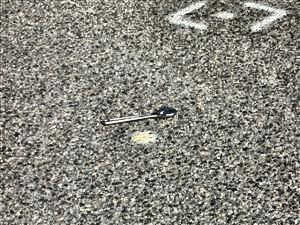

In [ ]:
import os
import cv2
import numpy as np
import albumentations as A
from ultralytics import YOLO
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score
import shutil
import yaml
import requests
import cv2
import numpy as np
import requests

def auto_enhance_image(image):
    """
    Automatically enhances the image based on lighting and contrast conditions.
    Applies low-light enhancement or fog (low contrast) enhancement as needed.
    """
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    brightness = np.mean(gray)
    contrast = gray.std()

    if brightness < 80:
        # Image is too dark → enhance brightness
        image = enhance_low_light(image)
    elif contrast < 30:
        # Image is low contrast (fog, haze) → apply CLAHE
        image = enhance_fog(image)

    return image

def enhance_low_light(image):
    """
    Enhances low-light images by equalizing the histogram of the V channel in HSV space.
    """
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)
    v = cv2.equalizeHist(v)
    hsv_enhanced = cv2.merge((h, s, v))
    return cv2.cvtColor(hsv_enhanced, cv2.COLOR_HSV2BGR)

def enhance_fog(image):
    """
    Enhances foggy or low-contrast images using CLAHE on the L channel in LAB space.
    """
    lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(lab)
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
    cl = clahe.apply(l)
    limg = cv2.merge((cl, a, b))
    return cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)

# Load image from path or URL
image_path = input("Enter image path or URL: ")

if image_path.startswith("http"):
    response = requests.get(image_path, stream=True).raw
    image_np = np.asarray(bytearray(response.read()), dtype="uint8")
    image1 = cv2.imdecode(image_np, cv2.IMREAD_COLOR)
else:
    image1 = cv2.imread(image_path)

# Apply automatic enhancement
enhanced_image = auto_enhance_image(image1)

from google.colab.patches import cv2_imshow
cv2_imshow(enhanced_image)



In [ ]:
!pip install inference-sdk


# **Runing The Image To The Model**

In [ ]:
from inference_sdk import InferenceHTTPClient

CLIENT = InferenceHTTPClient(
    api_url="https://serverless.roboflow.com",
    api_key="jk7ugNysQMZJ01ftYTny"
)

result = CLIENT.infer(image1, model_id="fod-brais/1")

# **The Result**

In [ ]:
print(result)


{'inference_id': '23b48a2c-b0c2-4f6a-9d1c-a02533ce8859', 'time': 0.011329118999128696, 'image': {'width': 300, 'height': 225}, 'predictions': [{'x': 140.0, 'y': 115.5, 'width': 78.0, 'height': 19.0, 'confidence': 0.8800884485244751, 'class': 'Wrenchtrack_idkeyframe', 'class_id': 27, 'detection_id': 'e6e9e702-3fc3-41ab-bfd4-2f2ed72bdbf2'}]}


# **Prediction with Label**

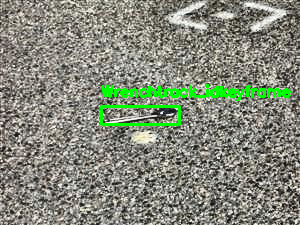

In [ ]:
# Extract prediction
for pred in result['predictions']:
    x, y = int(pred['x']), int(pred['y'])
    w, h = int(pred['width']), int(pred['height'])
    label = pred['class']
    conf = pred['confidence']

    # Compute top-left and bottom-right corners
    x1, y1 = x - w // 2, y - h // 2
    x2, y2 = x + w // 2, y + h // 2

    # Draw rectangle and label
    cv2.rectangle(enhanced_image, (x1, y1), (x2, y2), (0, 255, 0), 2)
    cv2.putText(enhanced_image, f"{label} ({conf:.2f})", (x1, y1 - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# Show the result
cv2_imshow(enhanced_image)


# **Download and load a YOLOv8-compatible model locally**

In [ ]:
from inference import get_model
model = get_model(model_id="fod-brais/1", api_key="6xJHUoljEvDdyjquCdUl")

ModelDependencyMissing: Your `inference` configuration does not support Qwen2.5-VL model. Use pip install 'inference[transformers]' to install missing requirements.
ModelDependencyMissing: Your `inference` configuration does not support SAM model. Use pip install 'inference[sam]' to install missing requirements.
ModelDependencyMissing: Your `inference` configuration does not support SAM model. Use pip install 'inference[sam]' to install missing requirements.
ModelDependencyMissing: Your `inference` configuration does not support SAM model. Use pip install 'inference[clip]' to install missing requirements.
ModelDependencyMissing: Your `inference` configuration does not support Gaze Detection model. Use pip install 'inference[gaze]' to install missing requirements.
ModelDependencyMissing: Your `inference` configuration does not support GroundingDINO model. Use pip install 'inference[grounding-dino]' to install missing requirements.
ModelDependencyMissing: Your `inference` configuration d

In [ ]:
predictions = model.infer(image1)
print(predictions)

[ObjectDetectionInferenceResponse(visualization=None, inference_id=None, frame_id=None, time=None, image=InferenceResponseImage(width=300, height=225), predictions=[ObjectDetectionPrediction(x=140.0, y=115.5, width=78.0, height=19.0, confidence=0.8793260455131531, class_name='Wrenchtrack_idkeyframe', class_confidence=None, class_id=27, tracker_id=None, detection_id='95c9ace7-3b42-4101-9ffc-9d268a2724ac', parent_id=None)])]
